In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import time
import demo_noise_distribution_data_importer as xxx
import scipy.stats as stats


In [2]:
data_set = xxx.getData()
#data_set: list([sessionName, chName, DataFrame(['time','raw','power'])])

100%|██████████| 4/4 [00:12<00:00,  3.42s/it]


In [3]:
def countWithRange(target, countRange=None, name='power'):
    if countRange is None:
        target_data = target[name].values
    else:
        target_data = target[name].values[countRange[0]:countRange[1]]
    utarget,uind=np.unique(target_data,return_inverse=True)
    target_count=np.bincount(uind)
    auc = target_count.sum()
    
    return utarget, target_count, auc

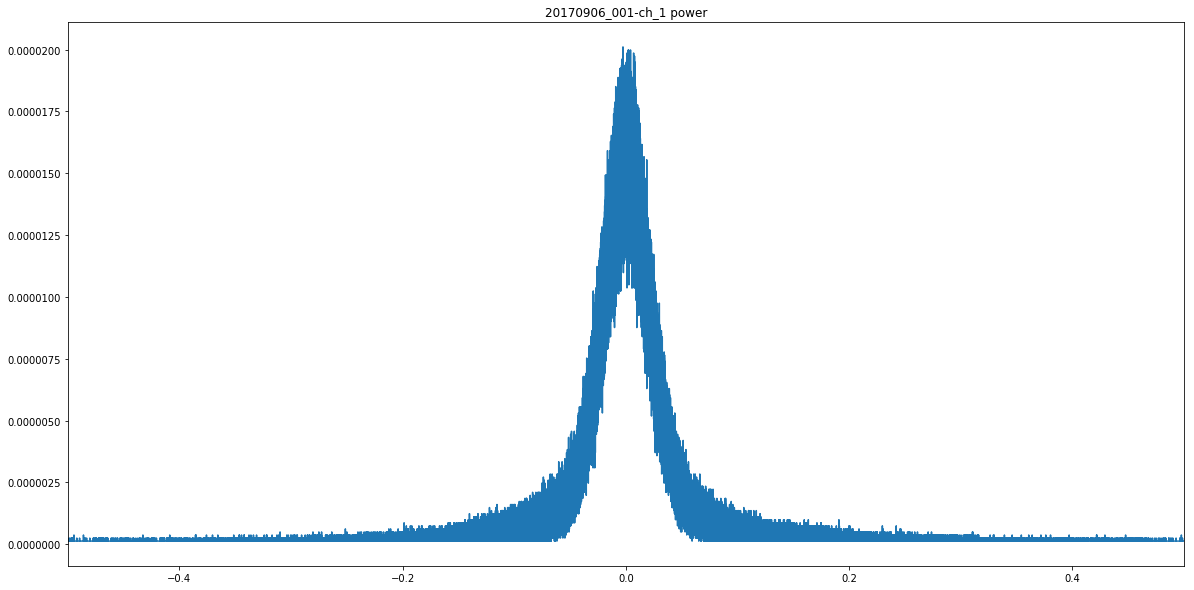

In [13]:
'''plt.figure(figsize=(20,10))
for sessionName, chName, dataSheet in data_set:
    uData, dataCount, auc = countWithRange(dataSheet, name='raw')
    
    plt.plot(uData, dataCount/auc, label='%s-ch_%d power'%(sessionName, chName))
    plt.legend()
    plt.xlim(-1,1)
plt.show()
plt.close()
'''
for sessionName, chName, dataSheet in data_set:
    if chName == 0:
        continue
    uData, dataCount, auc = countWithRange(dataSheet, name='raw')
    
    plt.figure(figsize=(20,10))
    plt.plot(uData, dataCount/auc)
    plt.title('%s-ch_%d power'%(sessionName, chName))
    plt.xlim(-0.5,0.5)
    plt.show()
    plt.close()
    break

# 将Raw Data压缩在Y轴上

raw data肉眼看可以说是一种正态分布的模式，因而用标准差来做阈值是合情合理的。
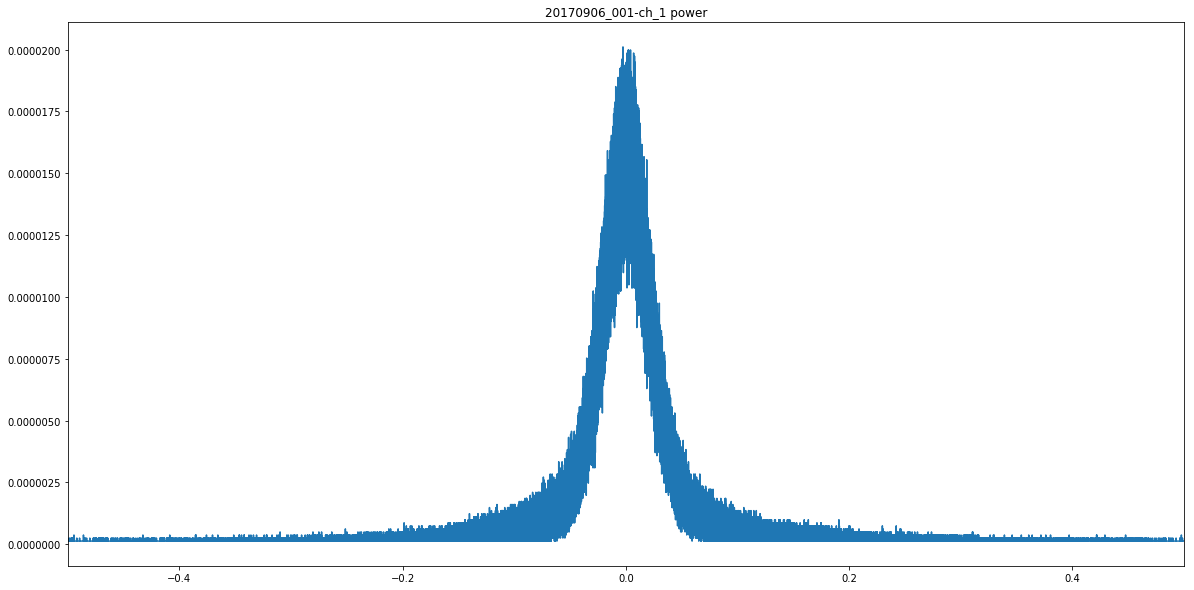

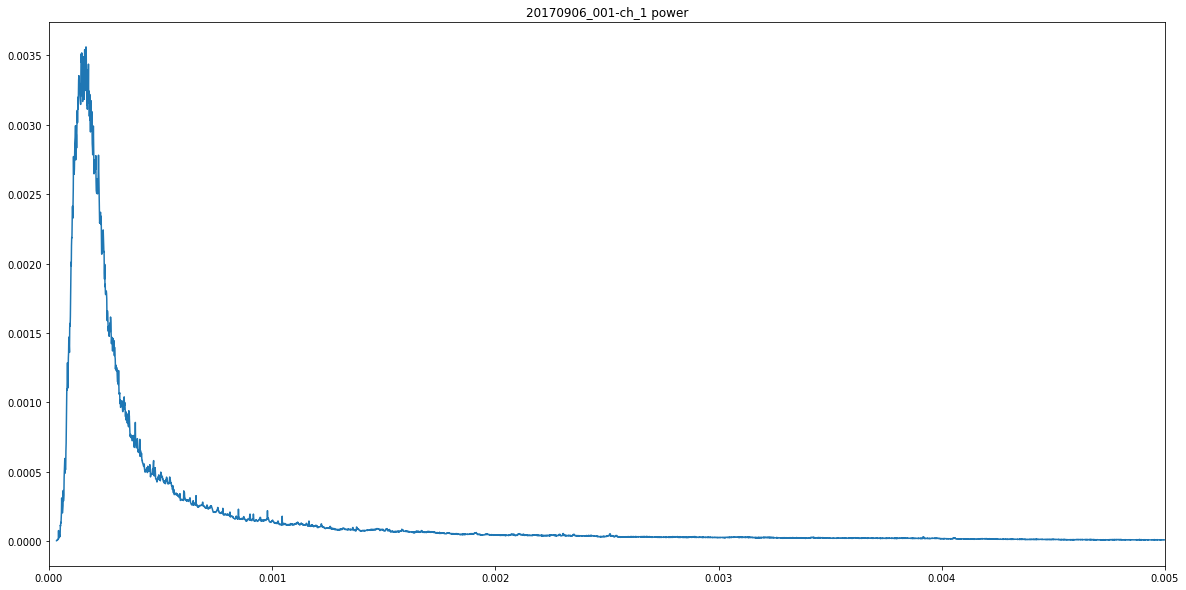

In [14]:
'''plt.figure(figsize=(20,10))
for sessionName, chName, dataSheet in data_set:
    uData, dataCount, auc = countWithRange(dataSheet)
    
    plt.plot(uData, dataCount/auc, label='%s-ch_%d power'%(sessionName, chName))
    #plt.legend(bbox_to_anchor=(1.01, 1), loc=2, borderaxespad=0.)
    plt.legend()
    plt.xlim(0,0.001)
plt.show()
plt.close()'''

for sessionName, chName, dataSheet in data_set:
    if chName == 0:
        continue
    uData, dataCount, auc = countWithRange(dataSheet)
    
    plt.figure(figsize=(20,10))
    plt.plot(uData, dataCount/auc)
    plt.title('%s-ch_%d power'%(sessionName, chName))
    plt.xlim(0,dataCount[-1]*0.005)
    plt.show()
    plt.close()
    break

# 将Power后的数据压缩在Y轴上
### power后的数据肉眼看并不是标准的正态分布
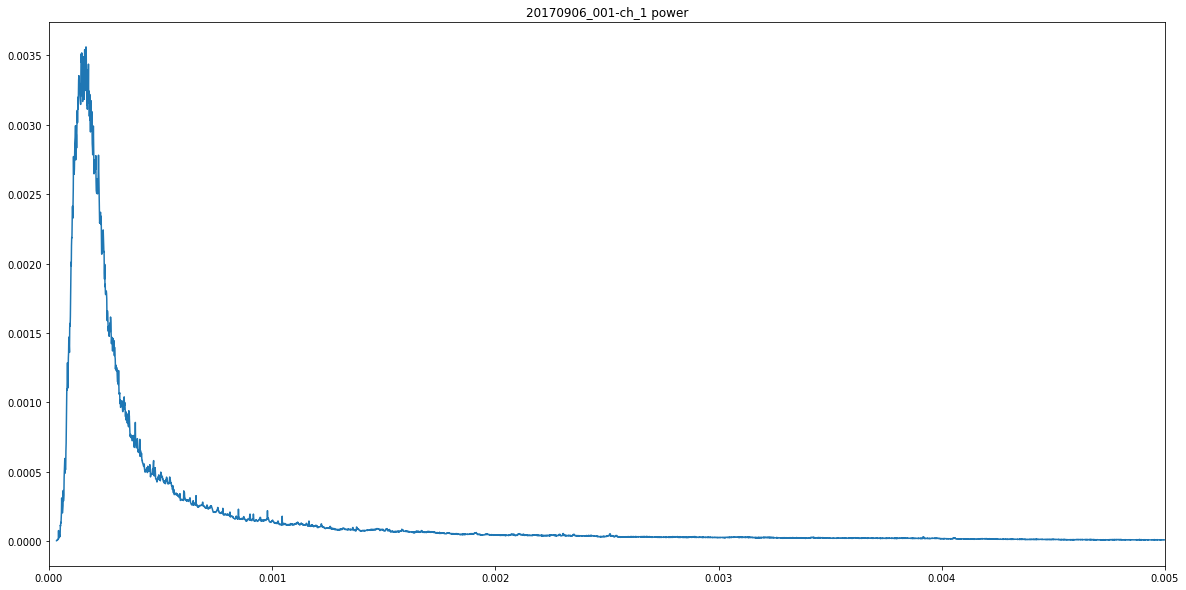

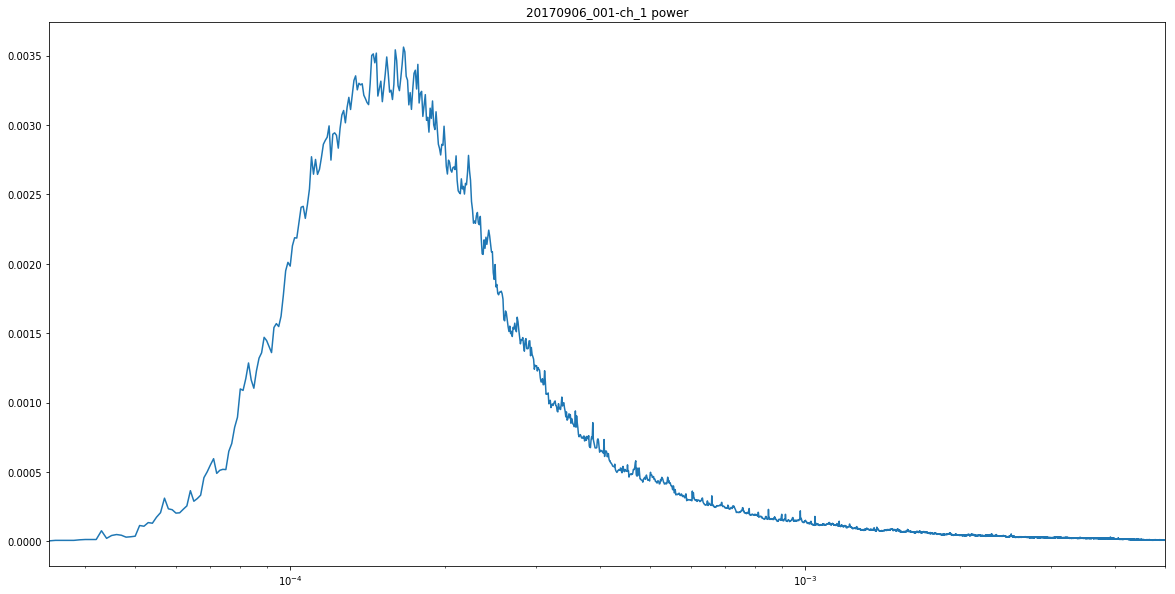

In [21]:
for sessionName, chName, dataSheet in data_set:
    if chName == 0:
        continue
    uData, dataCount, auc = countWithRange(dataSheet)
    logData = np.log10(dataSheet['power'].values)
    #stats.lognorm._fitstart(dataCount/auc)
    param = stats.norm.fit(logData) #
    #param = (0.73882778230976731, 3.8083454031158476e-05, 0.000161582113658737) #shape(sigma), loc, scale(mu)
    #pdf_fitted = stats.lognorm.pdf(uData, param[0], loc=param[1], scale=param[2])
    pdf_fitted = stats.norm.pdf(uData, loc=param[0], scale=param[1])

    plt.figure(figsize=(20,10))
    plt.semilogx(uData, dataCount/auc)
    #plt.plot(uData, pdf_fitted)
    plt.title('%s-ch_%d power'%(sessionName, chName))
    plt.xlim(0,dataCount[-1]*0.005)
    plt.show()
    plt.close()
    break;

# 但对x轴做log处理后又比较像正态分布了。

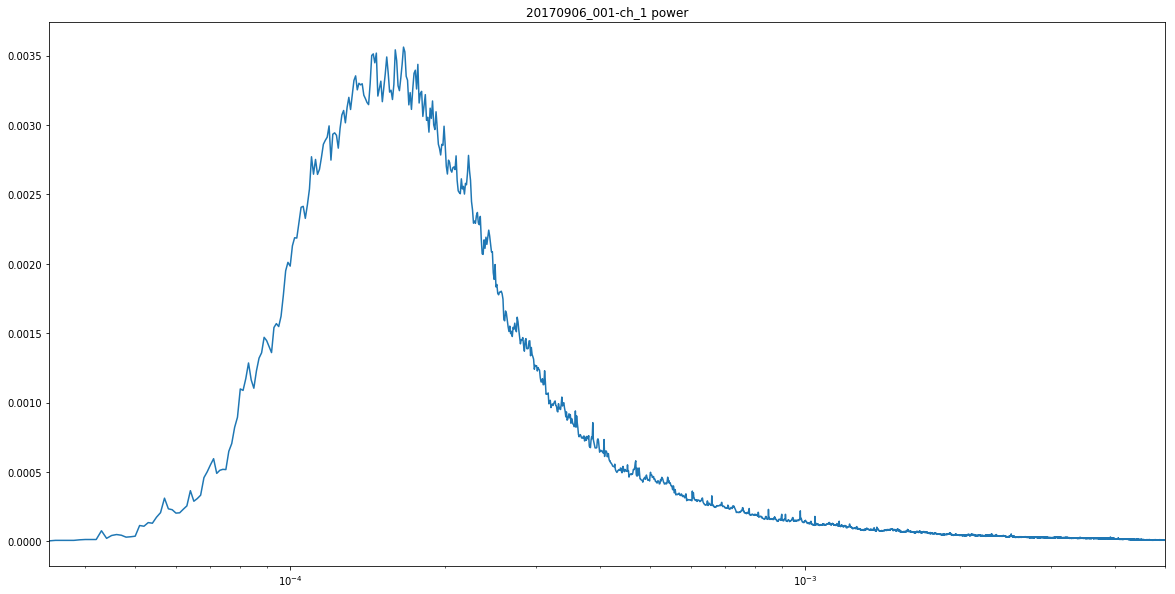

$$ y = \frac{1}{(x-\mu) \cdot \sqrt{2 \pi \sigma^2}} \cdot e^{- \frac{\log(\frac{x-\mu}{\alpha})^2}{2 \sigma^2}}$$

## 通过对比之前基于人工分析得到的参数，来对比新方法的有效性
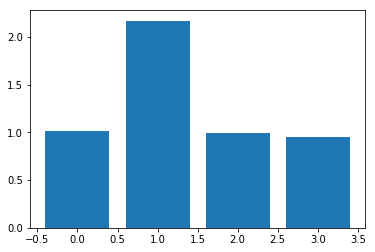
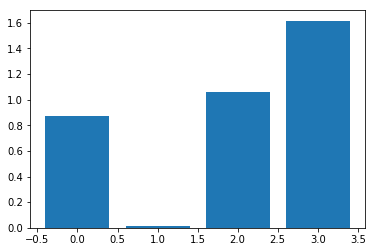

|Session| threshold | percentage| n|
| :--: | :--: |:--:|:--:|
|0906_001| 0.000449616734267| 0.666| 8|
|0906_003| 0.0248541996329| 0.99| 10|
|0907_001| 0.000217336669261| 0.55| 1| 
|0907_002| 0.000146221708007| 0.27| 3|

20170906_001 : -3.40757303331
20170906_003 : -3.47922649343
20170907_001 : -3.63812415751
20170907_002 : -3.62677197972


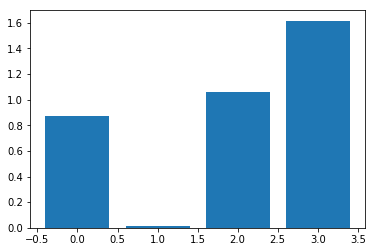

In [47]:
Expected = {'20170906_001':0.000449616734267,
    '20170906_003':0.0248541996329,
    '20170907_001':0.000217336669261,
    '20170907_002':0.000146221708007}
i = 0
result = []
for sessionName, chName, dataSheet in data_set:
    if chName == 0:
        continue
    uData, dataCount, auc = countWithRange(dataSheet)
    logData = np.log10(dataSheet['power'].values)
    param = stats.norm.fit(logData) #
    
    ratio = 10**(param[0])/(Expected[sessionName])
    result.append(ratio)
    print(sessionName,':',param[0])

plt.figure()
plt.bar(range(4), result)
plt.show()
plt.close()